<a href="https://colab.research.google.com/github/pasumarthi/EVA/blob/master/Session10/Assignment_10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from keras.applications.vgg16 import VGG16, preprocess_input, decode_predictions
from keras.preprocessing import image
import numpy as np
import cv2
from keras import backend as K
import time
import matplotlib.pyplot as plt
import numpy as np
% matplotlib inline
np.random.seed(2017) 
from keras.models import Sequential,Model
from keras.layers.convolutional import Convolution2D, MaxPooling2D,Conv2D
from keras.layers.advanced_activations import ReLU, Softmax
from keras.layers import Activation, Flatten, Dense, Dropout
from keras.layers.normalization import BatchNormalization
from keras.utils import np_utils
from keras.layers import Activation, Flatten, Dense, Dropout, Concatenate, GlobalAveragePooling2D, Input, Lambda, SpatialDropout2D,GlobalMaxPooling2D

In [0]:
model = VGG16(weights="imagenet")
from skimage import io
dog = io.imread("https://www.rspcapetinsurance.org.au/rspca/media/images/hero/dog-insurance-hero.jpg")
dog = cv2.resize(dog, dsize=(224, 224), interpolation=cv2.INTER_CUBIC)
x = image.img_to_array(dog)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

In [75]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
__________

In [0]:
preds = model.predict(x)
#print(preds.shape)

class_idx = np.argmax(preds[0])
#print(class_idx)
class_output = model.output[:, class_idx]
#print(class_output)
last_conv_layer = model.get_layer("block5_conv3")

In [0]:
grads = K.gradients(class_output, last_conv_layer.output)[0]
#print(grads.shape)
pooled_grads = K.mean(grads, axis=(0, 1, 2))
#print(pooled_grads.shape)
iterate = K.function([model.input], [pooled_grads, last_conv_layer.output[0]])

pooled_grads_value, conv_layer_output_value = iterate([x])

for i in range(512):
  conv_layer_output_value[:, :, i] *= pooled_grads_value[i]

In [0]:
heatmap = np.mean(conv_layer_output_value, axis = -1)
#print(conv_layer_output_value.shape)
#print(heatmap.shape)
heatmap = np.maximum(heatmap, 0)
heatmap /= np.max(heatmap)

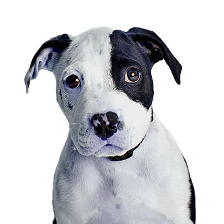

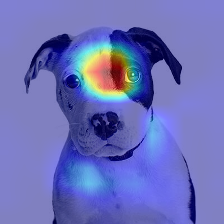

In [80]:
heatmap = cv2.resize(heatmap, (dog.shape[1], dog.shape[0]))
heatmap = np.uint8(255 * heatmap)
heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)
superimposed_img = cv2.addWeighted(dog, 0.5, heatmap, 0.5, 0)
from google.colab.patches import cv2_imshow
cv2_imshow( dog)
cv2_imshow(superimposed_img)

In [81]:
!wget https://media.karousell.com/media/photos/products/2018/08/20/16_scale_tony_stark_avenger3_headscrupt_with_glasses_1534759826_e79b0cf4.jpg

--2019-07-08 15:53:30--  https://media.karousell.com/media/photos/products/2018/08/20/16_scale_tony_stark_avenger3_headscrupt_with_glasses_1534759826_e79b0cf4.jpg
Resolving media.karousell.com (media.karousell.com)... 190.93.244.83, 141.101.114.84, 190.93.246.83, ...
Connecting to media.karousell.com (media.karousell.com)|190.93.244.83|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 58670 (57K) [image/jpeg]
Saving to: ‘16_scale_tony_stark_avenger3_headscrupt_with_glasses_1534759826_e79b0cf4.jpg.1’

16_scale_tony_stark 100%[===================>]  57.29K  --.-KB/s    in 0.01s   

2019-07-08 15:53:30 (4.87 MB/s) - ‘16_scale_tony_stark_avenger3_headscrupt_with_glasses_1534759826_e79b0cf4.jpg.1’ saved [58670/58670]



In [82]:
!ls

16_scale_tony_stark_avenger3_headscrupt_with_glasses_1534759826_e79b0cf4.jpg
16_scale_tony_stark_avenger3_headscrupt_with_glasses_1534759826_e79b0cf4.jpg.1
sample_data


In [0]:
import matplotlib.pyplot as plt

file_name = '/content/16_scale_tony_stark_avenger3_headscrupt_with_glasses_1534759826_e79b0cf4.jpg'

tony=plt.imread(file_name)


In [84]:
tony.dtype

dtype('uint8')

In [0]:
tony = cv2.resize(tony, dsize=(224, 224), interpolation=cv2.INTER_CUBIC)
x = np.expand_dims(tony, axis=0)
x = preprocess_input(x)

In [0]:
preds = model.predict(x)
class_idx = np.argmax(preds[0])
class_output = model.output[:, class_idx]


(512,)


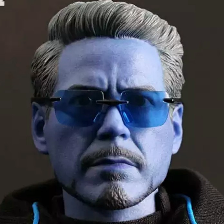

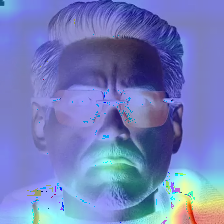

In [93]:
             last_conv_layer = model.get_layer("block5_conv3")
             grads = K.gradients(class_output, last_conv_layer.output)[0]
             pooled_grads = K.mean(grads, axis=(0, 1, 2))
             print(pooled_grads.shape)
             iterate = K.function([model.input], [pooled_grads, last_conv_layer.output[0]])
             pooled_grads_value, conv_layer_output_value = iterate([x]) 
             conv_layer_output_value[:, :, i] *= pooled_grads_value[i]
             heatmap = np.mean(conv_layer_output_value, axis=-1)
             heatmap = np.maximum(heatmap, 0)
             heatmap /= np.max(heatmap)
             heatmap = cv2.resize(heatmap, (tony.shape[1], tony.shape[0]))
             heatmap = np.uint8(255 * heatmap)
             img = np.uint8(255 * tony)
             heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)
             superimposed_img = cv2.addWeighted(img, 0.6, heatmap, 0.4, 0)
             concatimg = cv2.hconcat([img,superimposed_img]) 
             from google.colab.patches import cv2_imshow
             cv2_imshow( tony)
             cv2_imshow(superimposed_img) 

(512,)


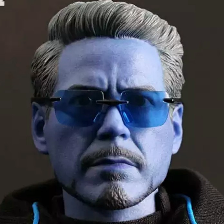

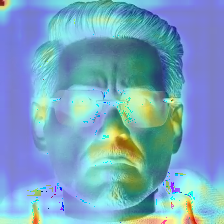

In [96]:
             last_conv_layer = model.get_layer("block4_conv3")
             grads = K.gradients(class_output, last_conv_layer.output)[0]
             pooled_grads = K.mean(grads, axis=(0, 1, 2))
             print(pooled_grads.shape)
             iterate = K.function([model.input], [pooled_grads, last_conv_layer.output[0]])
             pooled_grads_value, conv_layer_output_value = iterate([x]) 
             conv_layer_output_value[:, :, i] *= pooled_grads_value[i]
             heatmap = np.mean(conv_layer_output_value, axis=-1)
             heatmap = np.maximum(heatmap, 0)
             heatmap /= np.max(heatmap)
             heatmap = cv2.resize(heatmap, (tony.shape[1], tony.shape[0]))
             heatmap = np.uint8(255 * heatmap)
             img = np.uint8(255 * tony)
             heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)
             superimposed_img = cv2.addWeighted(img, 0.6, heatmap, 0.4, 0)
             concatimg = cv2.hconcat([img,superimposed_img]) 
             from google.colab.patches import cv2_imshow
             cv2_imshow( tony)
             cv2_imshow(superimposed_img) 

(512,)


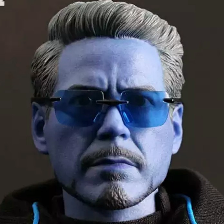

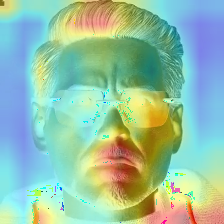

In [95]:
             last_conv_layer = model.get_layer("block5_conv1")
             grads = K.gradients(class_output, last_conv_layer.output)[0]
             pooled_grads = K.mean(grads, axis=(0, 1, 2))
             print(pooled_grads.shape)
             iterate = K.function([model.input], [pooled_grads, last_conv_layer.output[0]])
             pooled_grads_value, conv_layer_output_value = iterate([x]) 
             conv_layer_output_value[:, :, i] *= pooled_grads_value[i]
             heatmap = np.mean(conv_layer_output_value, axis=-1)
             heatmap = np.maximum(heatmap, 0)
             heatmap /= np.max(heatmap)
             heatmap = cv2.resize(heatmap, (tony.shape[1], tony.shape[0]))
             heatmap = np.uint8(255 * heatmap)
             img = np.uint8(255 * tony)
             heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)
             superimposed_img = cv2.addWeighted(img, 0.6, heatmap, 0.4, 0)
             concatimg = cv2.hconcat([img,superimposed_img]) 
             from google.colab.patches import cv2_imshow
             cv2_imshow( tony)
             cv2_imshow(superimposed_img) 